<a href="https://colab.research.google.com/github/benasphy/hierarchical-clustering/blob/main/Spending_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

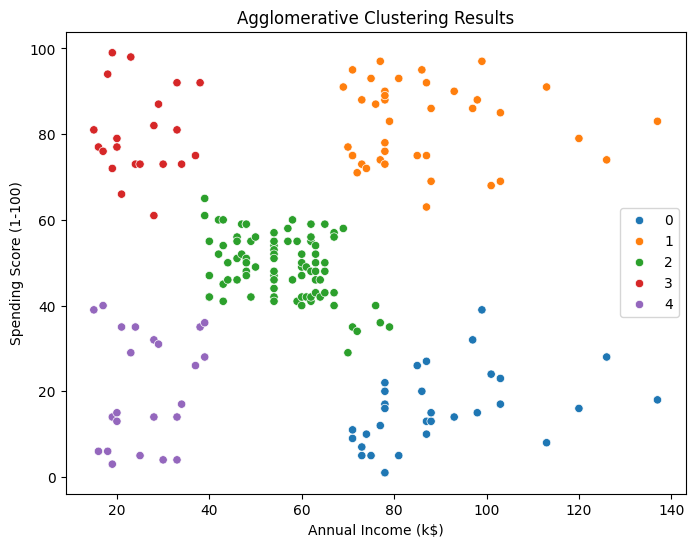

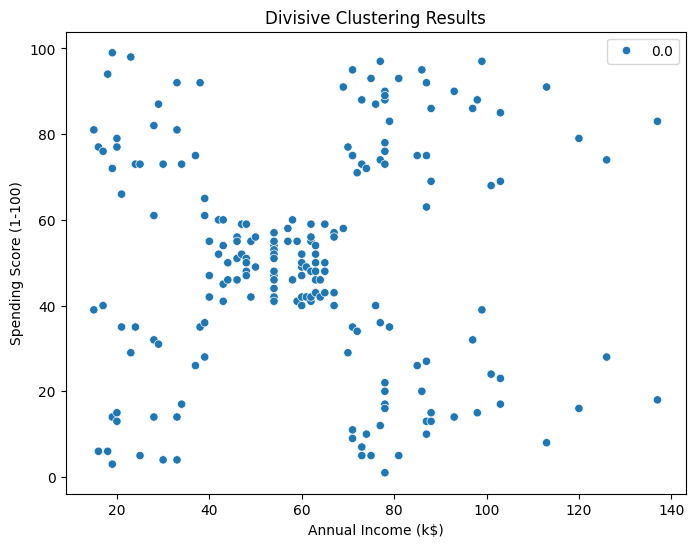

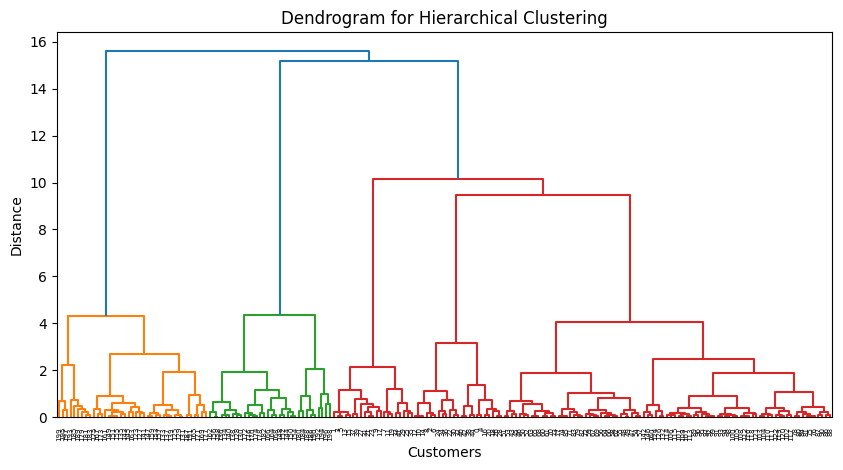

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Load dataset
url = "/content/customers.csv"
df = pd.read_csv(url)

# Selecting relevant features: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agg = agg_clustering.fit_predict(X_scaled)

df['Agglomerative Cluster'] = labels_agg

# Plot Agglomerative Clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels_agg, palette='tab10')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Divisive Clustering (Recursive Bisection)
def divisive_clustering(X, n_clusters):
    from scipy.spatial.distance import pdist, squareform

    clusters = [X]
    cluster_labels = np.zeros(X.shape[0])
    cluster_id = 0

    while len(clusters) < n_clusters:
        # Find largest cluster to split
        largest_cluster_idx = np.argmax([len(c) for c in clusters])
        largest_cluster = clusters.pop(largest_cluster_idx)

        # Compute distance matrix and apply hierarchical clustering
        dist_matrix = squareform(pdist(largest_cluster))
        Z = linkage(largest_cluster, method='ward')
        new_labels = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(largest_cluster)

        # Split into two clusters
        clusters.append(largest_cluster[new_labels == 0])
        clusters.append(largest_cluster[new_labels == 1])

        # Assign new labels
        cluster_labels[cluster_labels == cluster_id] = len(clusters) - 2
        cluster_id += 1

    return cluster_labels

# Apply Divisive Clustering
div_labels = divisive_clustering(X_scaled, n_clusters=5)
df['Divisive Cluster'] = div_labels

# Plot Divisive Clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=div_labels, palette='tab10')
plt.title('Divisive Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Plot dendrogram
plt.figure(figsize=(10, 5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()
